##Downloading dataset





In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [ ]:
ls

gtsrb-german-traffic-sign.zip  Meta.csv      Test/     Train/
meta/                          sample_data/  Test.csv  Train.csv
Meta/                          test/         train/


##Importing Libraries

In [ ]:
import random
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow as tf

##Viewing the Test Images

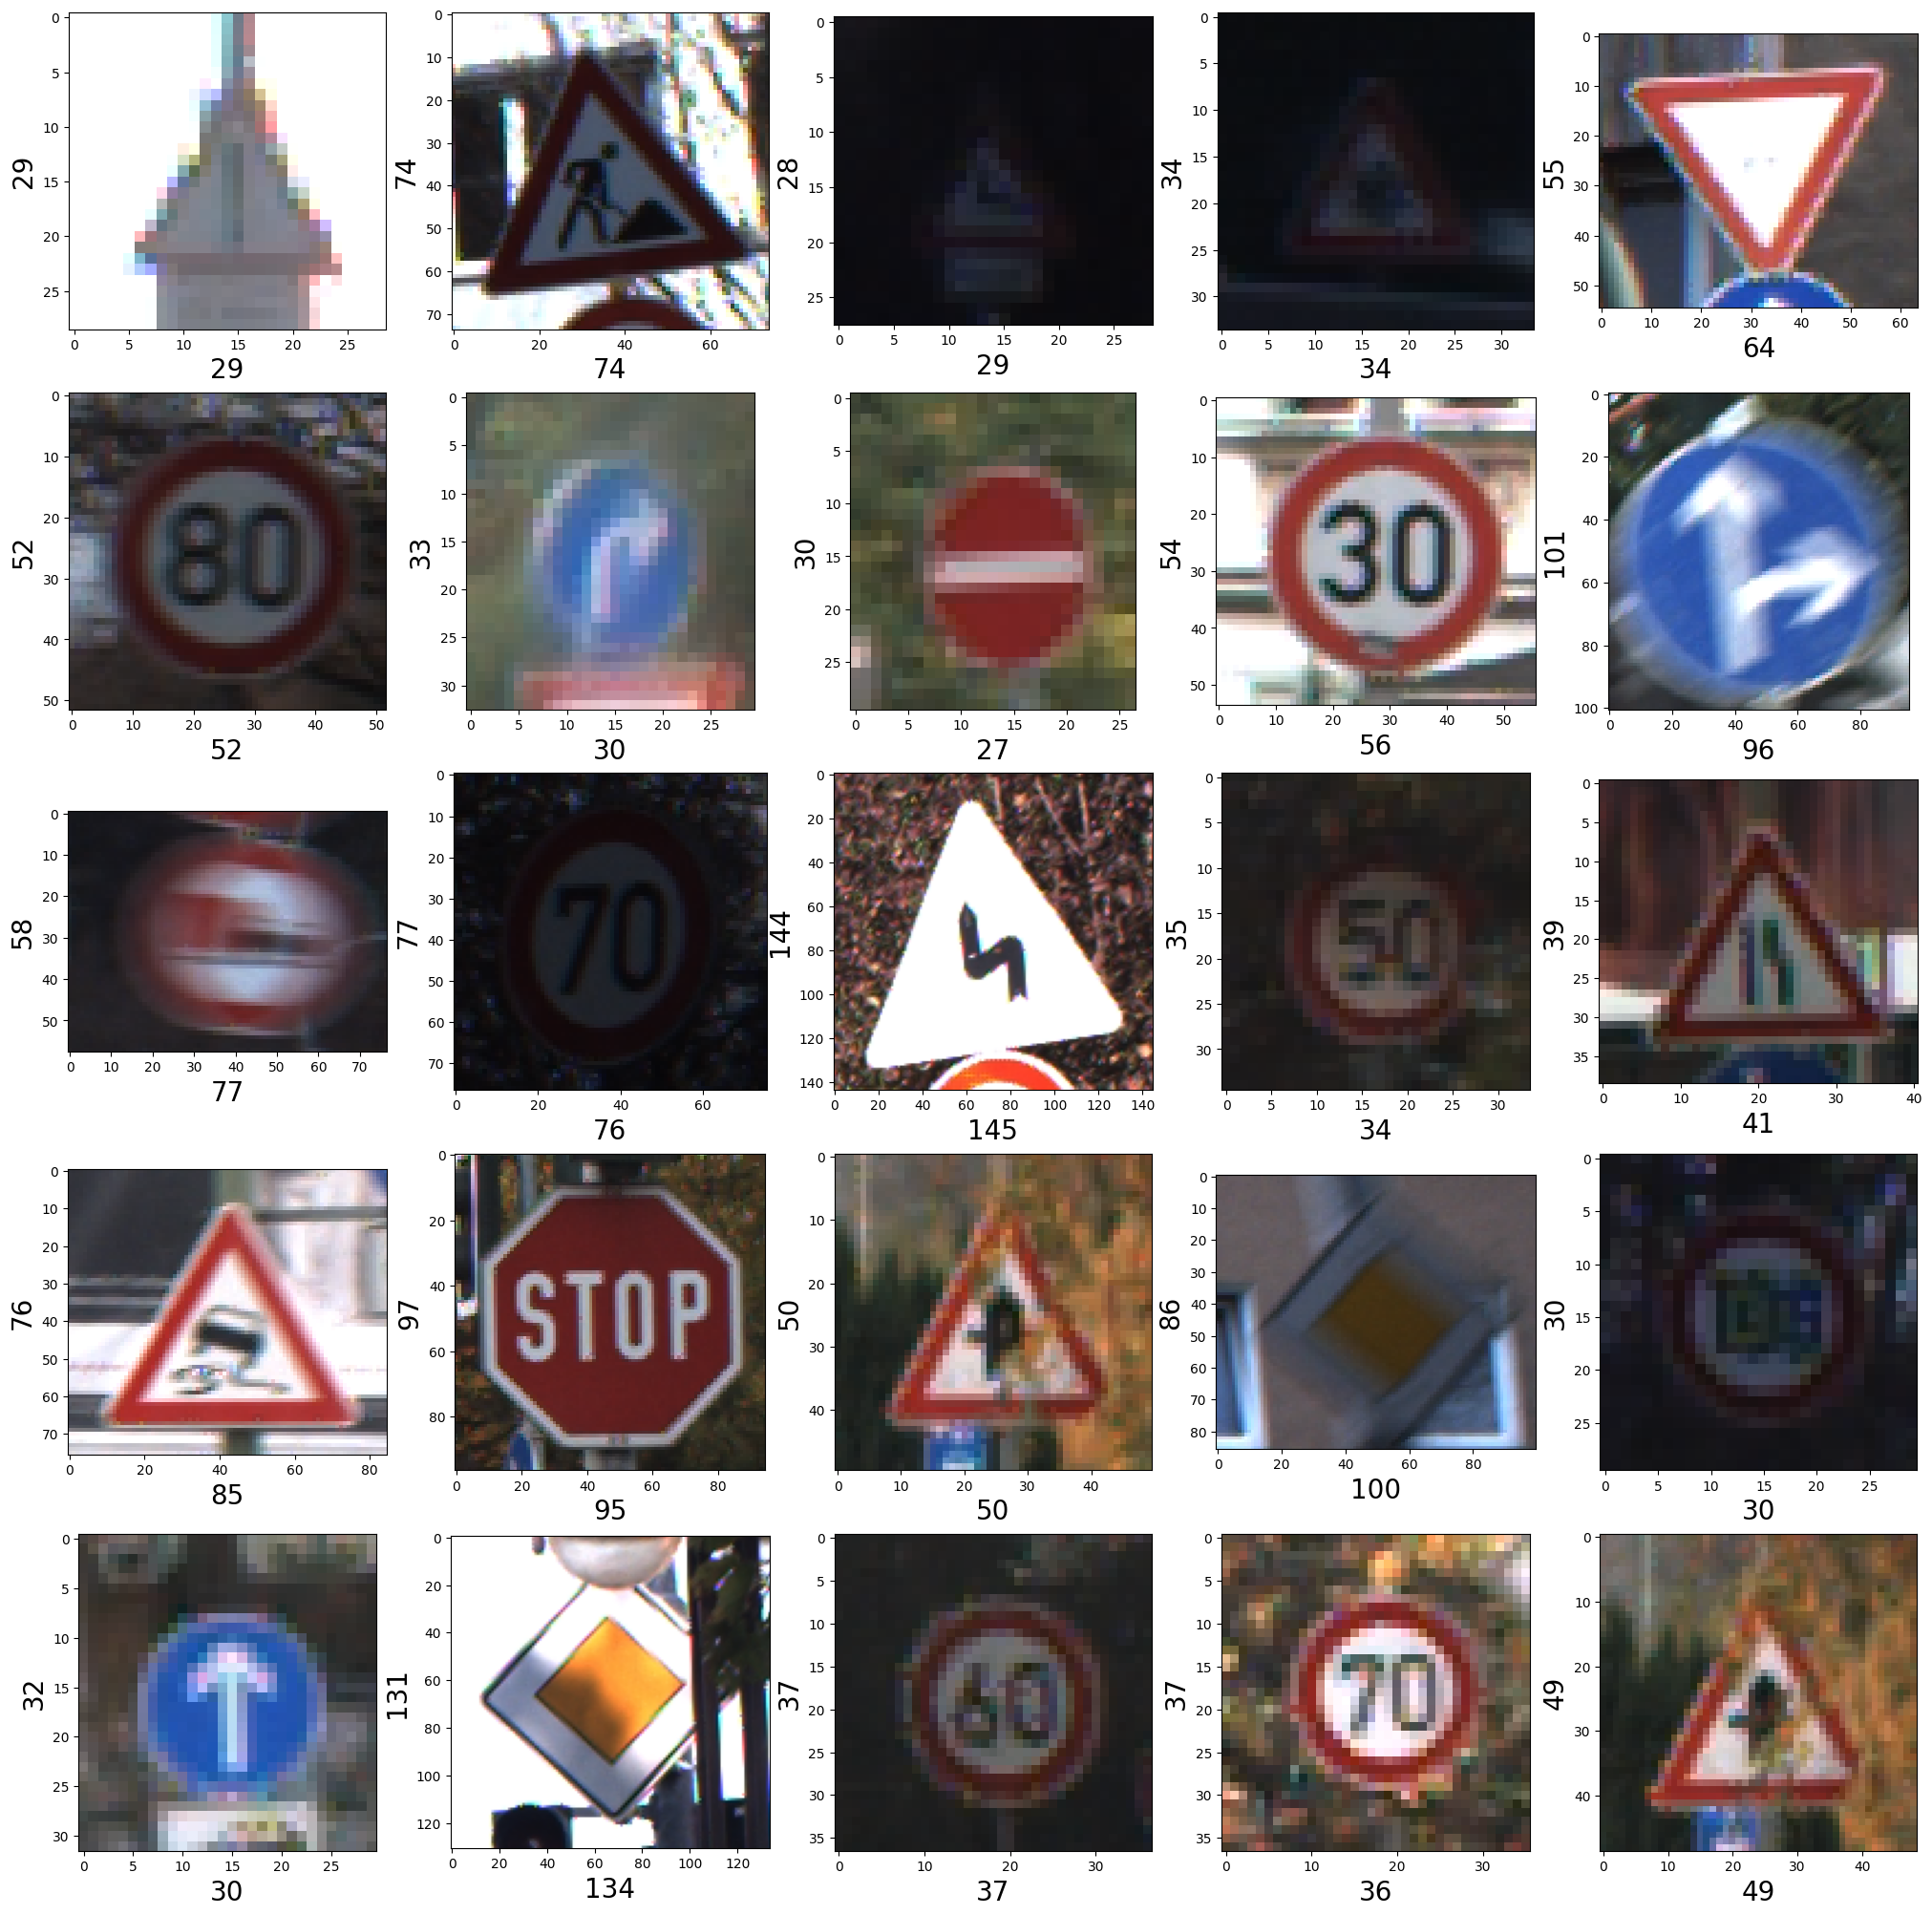

In [ ]:
test = pd.read_csv('Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path =  random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)

    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

#Get The Image Data and Labels

In [ ]:
image_data = []
image_labels = []

IMG_HEIGHT = 50
IMG_WIDTH  = 50

NUM_CATEGORIES = len(os.listdir("Train/"))
print("Total number of classes are : "+str(NUM_CATEGORIES))

for i in range(NUM_CATEGORIES):
    path = 'Train/' + str(i)
    images = os.listdir(path)


    for img in images:
        image = cv2.imread(path + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        image_data.append(np.array(resize_image))
        image_labels.append(i)

#list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

Total number of classes are : 43


In [ ]:
image_labels.shape

(39209,)

In [ ]:
image_data.shape

(39209, 50, 50, 3)

##Splitting the data into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(31367, 43)
(7842, 43)


##Creating The Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

learning_rate = 0.001
epochs = 12

opt = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, decay=learning_rate / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

##Train The Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/12
981/981 [==============================] - 34s 34ms/step - loss: 0.9292 - accuracy: 0.7515 - val_loss: 0.1266 - val_accuracy: 0.9625
Epoch 2/12
981/981 [==============================] - 35s 35ms/step - loss: 0.1390 - accuracy: 0.9594 - val_loss: 0.0279 - val_accuracy: 0.9922
Epoch 3/12
981/981 [==============================] - 34s 34ms/step - loss: 0.0792 - accuracy: 0.9773 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 4/12
981/981 [==============================] - 34s 34ms/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.0130 - val_accuracy: 0.9966
Epoch 5/12
981/981 [==============================] - 33s 34ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0202 - val_accuracy: 0.9946
Epoch 6/12
981/981 [==============================] - 35s 36ms/step - loss: 0.0379 - accuracy: 0.9890 - val_loss: 0.0102 - val_accuracy: 0.9974
Epoch 7/12
981/981 [==============================] - 33s 34ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0109 - val_accuracy:

##Stats

<ipython-input-41-cb32046a13bc>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


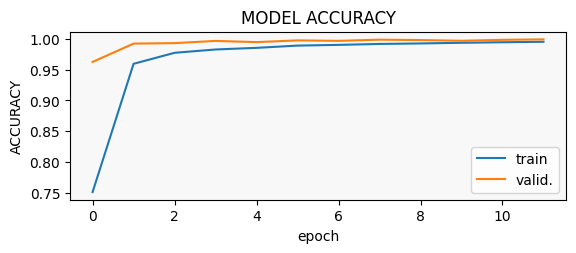

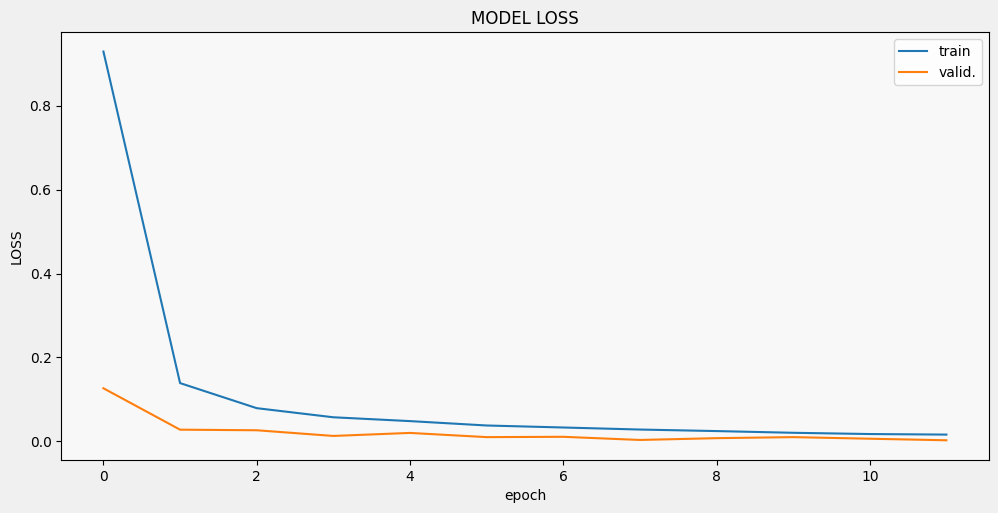

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])


display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


In [ ]:
score = model.evaluate(X_train,y_train,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

981/981 [==============================] - 4s 4ms/step - loss: 5.5561e-04 - accuracy: 0.9999
Accuracy: 99.99%
Loss:  0.000555605860427022


In [ ]:
score = model.evaluate(X_val, y_val,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

246/246 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.9991
Accuracy: 99.91%
Loss:  0.002636796096339822


##SAVE THE MODEL

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

##Reload The Saved Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/label_names.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

reconstructed_model = tf.keras.models.load_model('model.h5')

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.COLOR_BGR2RGB)
  # Must be  (x,x,3)
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(50,50),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(np.argmax(result))
  rslt = np.argmax(result)
  cv2_imshow(resized)
  matched_row = data[data.index == rslt]
  if not matched_row.empty:
    name = matched_row['SignName'].values[0]
    print(f"The name Traffic Sign's ClassId is {rslt} its called as: {name}")
  else:
    print(f"No matching ClassId found: {rslt}")

##Predicting the Random Image

##RESULT##


Original Dimensions :  (88, 100, 3)
1/1 [==============================] - 0s 279ms/step
11


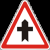

The name Traffic Sign's ClassId is 11 its called as: Right-of-way at the next intersection


In [ ]:
result = GetResultForImage("/content/Meta/11.png")

Original Dimensions :  (100, 100, 3)
1/1 [==============================] - 0s 23ms/step
42


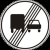

The name Traffic Sign's ClassId is 42 its called as: End of no passing by vehicles over 3.5 metric tons


In [ ]:
result = GetResultForImage("/content/Meta/42.png")

Original Dimensions :  (100, 100, 3)
1/1 [==============================] - 0s 19ms/step
2


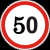

The name Traffic Sign's ClassId is 2 its called as: Speed limit (50km/h)


In [ ]:
result = GetResultForImage("/content/Meta/2.png")